In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Connecting to database

In [2]:
conn = sqlite3.connect(r'D:\data_analysis\geospatial Analysis\zomato_rawdata.sqlite')

Reading a table from database

In [3]:
df = pd.read_sql_query("SELECT * FROM users", conn)

In [4]:
df.shape

(51717, 18)

In [5]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Dealing with Missing Values

In [6]:
# Checking if null values exist
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

To get how much data is missing in percentage, we can divide the total missing values of each feature with the length of the dataframe * 100

In [7]:
df.isnull().sum() / len(df) * 100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

From the above calculation, we can see that if we were to remove the rows where the missing values of dish_liked is about 54%, we will lose half of data to correctly analyse and draw insights from. Simiarly, rate has 15% missing values.

In [8]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Starting with rate, we see which values are being stored. Here, we see some irrelevant string values. Usually, to replace these values, we have to discuss with domain experts to handle specific incorrect data. Supposed after conversation with the domain experts, we might have to add 0 or missing value.

In [9]:
df['rate'].replace(('NEW','-'), np.nan, inplace=True)

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Here, we replaced the irrelevant data with nan (not a number) denoted for missing values. But the rating still isn't clean for analysis. We need only the rating such as 4.2 not 4.2/5. We need to delete the later part.

In [11]:
print('4.2/5'.split('/')[0])
print(type('4.2/5'.split('/')[0]))

4.2
<class 'str'>


We need it to be numerical to analyse correctly.

In [12]:
float('4.2/5'.split('/')[0])

4.2

However, in the dataframe, we replaced the incorrect values with nan which is of float datatype and not string like other data such as '4.5/5'. 

We need to keep in mind of this when we are cleaning the data.

In [13]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x) == str else x)

Above line uses the anonymous function lambda. We can apply functions on dataframe using apply() and here we are applying lambda to the 'rate' feature of the dataframe.

lambda x: float(x.split('/')[0]) if type(x) == str else x simply means that if x, each value in this column is string, apply the split, otherwise leave it as it is. It is similar to the ternary operator or list comprehension in syntax structure but for evaluating conditions in anonymous function.

Anonymous function: lambda x: float(x.split('/')[0]) if type(x) == str else x

Ternary operator: x = x.split('/')[0] if type(x) == str ? else x

list comprehension: x = [x for x in rates if type(x) == str x.split('/')[0]]

In [14]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

Analysing relation between online ordering and rating

Counts of Restaurants at each rating who accept and not accept online order.

In [15]:
p_table = pd.crosstab(df['rate'],df['online_order'])

In [16]:
p_table.head(10)

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


Number of restaurants at x rating which accepts and not accepts online order. 

<Axes: xlabel='rate'>

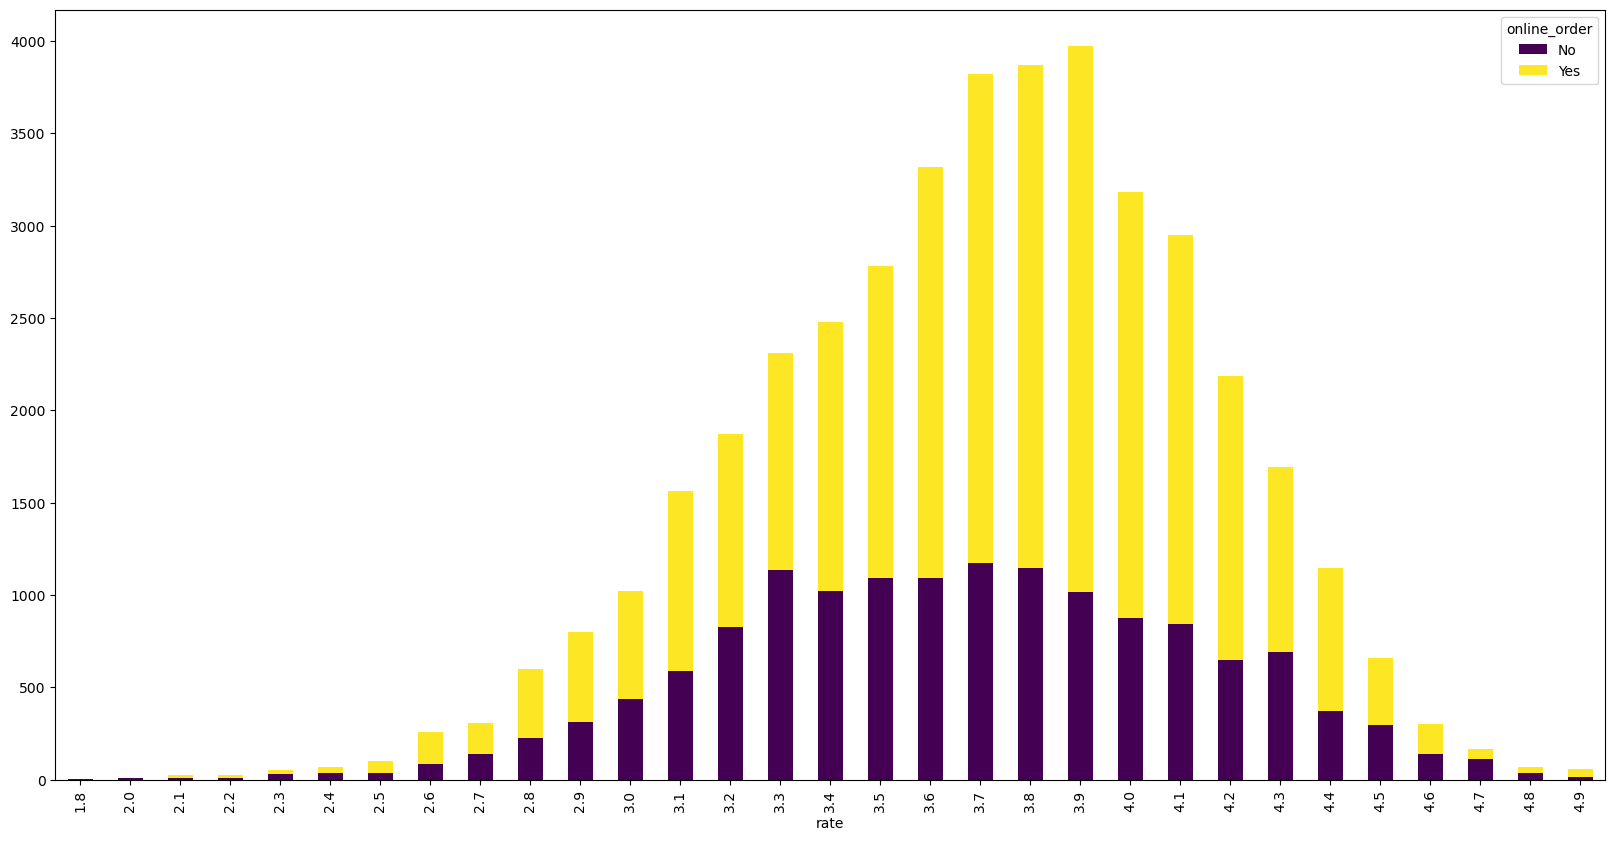

In [17]:
p_table.plot(kind='bar', stacked=True, colormap='viridis', figsize=(20,10))

In [18]:
p_table.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [19]:
normalised_df = p_table.div(p_table.sum(axis=1).astype(float), axis=0)

In [20]:
(normalised_df * 100).head(10)

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

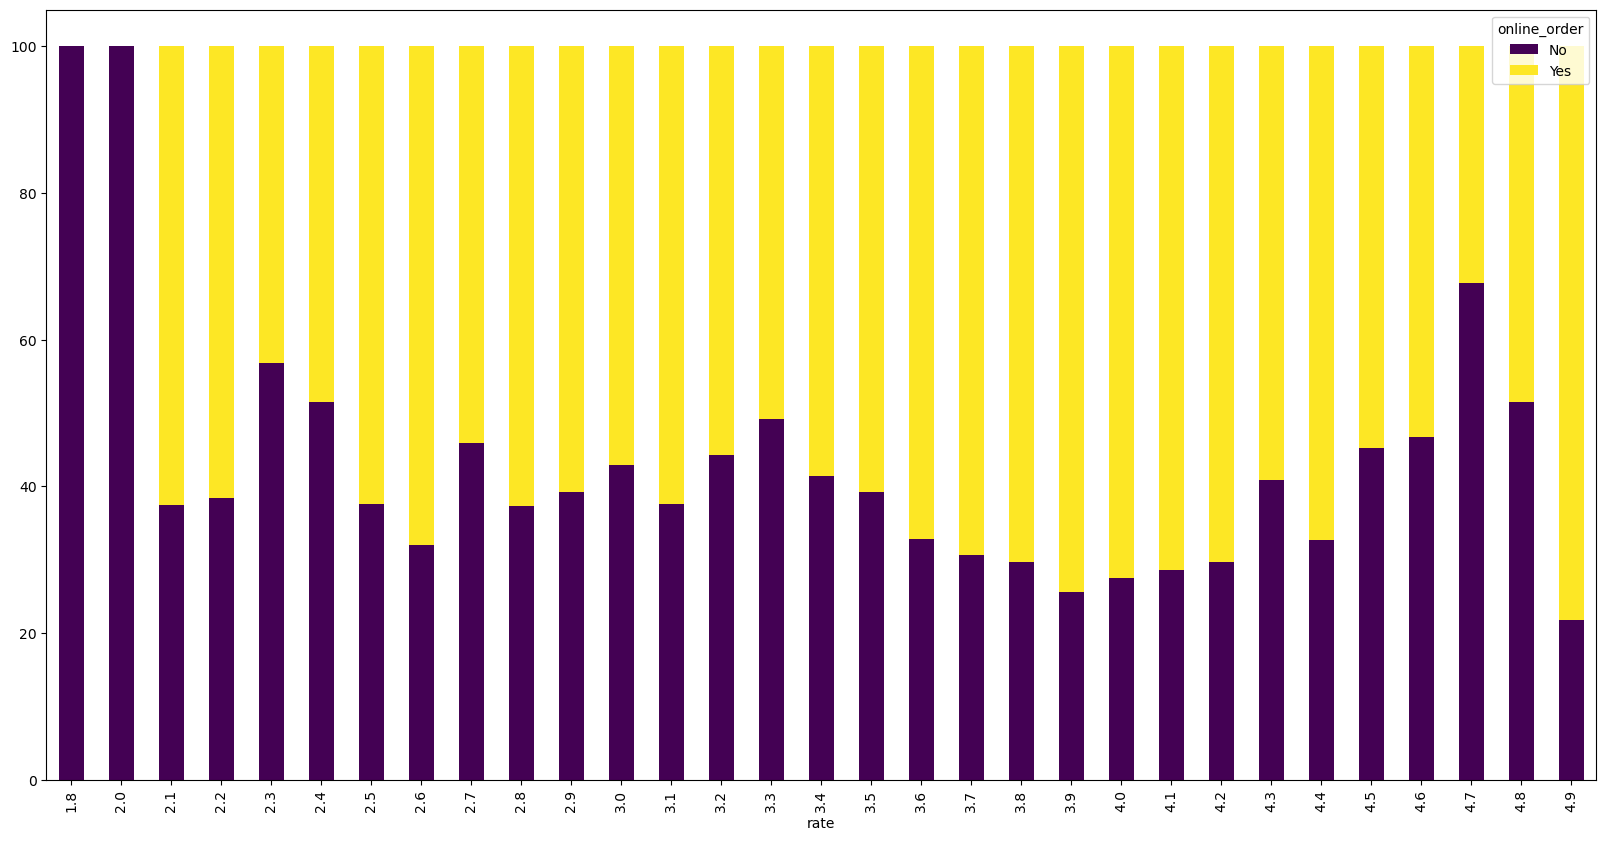

In [21]:
(normalised_df * 100).plot(kind='bar', stacked=True, colormap='viridis', figsize=(20,10))

From this 100% filled plot, we can see that restaurants which accept online orders have higher ratings than those which do not accept.

Data Cleaning for text analysis

What are the most famous dishes?
What are some of the keywords users are typing in zomato?

What are the reviews of users, positive/negative? - We can use wordcloud for review analysis but not available for counting 

Example - Briyani - 90k, Chicken - 100k - we can plot lines/bars with numbers.

First let us text clean.

In [22]:
df['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51717, dtype: object

In [23]:
df['rest_type'].isnull().sum()

227

In [24]:
data = df.dropna(subset=['rest_type'])

In [25]:
data['rest_type'].isnull().sum()

0

In [26]:
data.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Notice that this new dataframe has many different types of restaurant: we can analyse for particular types of restaurants or cafes without analysing all of it in general. It is more appropriate to analyse data across the same type of restaurants.

In [27]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [28]:
quick_bites_df.shape

(20639, 18)

In [29]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [30]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [31]:
quick_bites_df.loc[:,'review_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())
# OR
# quick_bites_df.loc[:, 'reviews_list'] = quick_bites_df['reviews_list'].str.lower()

C:\Users\Than Aung Kyaw\AppData\Local\Temp\ipykernel_18228\1146861555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df.loc[:,'review_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())


We will also remove special characters such as \n \b. 

We will also create tokens excluding these characters.

We will use regular expressions to filter them out.

In [32]:
from nltk.corpus import RegexpTokenizer as reg

In [33]:
tokenizer = reg("[a-zA-Z]+")

In [34]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [35]:
tokenizer.tokenize(quick_bites_df['review_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

We need to apply this tokenizer to each row of the dataframe , quickbites

Use sample data for low specs. For now we will sample from all data not just quickbites data.

In [36]:
sample_data = data[0:1000]

In [37]:
sample_data.shape

(1000, 18)

In [38]:
review_tokens = sample_data['reviews_list'].apply(tokenizer.tokenize)

In [39]:
review_tokens

0       [Rated, RATED, n, A, beautiful, place, to, din...
1       [Rated, RATED, n, Had, been, here, for, dinner...
2       [Rated, RATED, n, Ambience, is, not, that, goo...
3       [Rated, RATED, n, Great, food, and, proper, Ka...
4       [Rated, RATED, n, Very, good, restaurant, in, ...
                              ...                        
995     [Rated, RATED, n, Ideal, for, quick, neighborh...
996     [Rated, RATED, n, We, ordered, for, Alankrutha...
997     [Rated, RATED, n, This, review, should, have, ...
998     [Rated, RATED, n, We, tried, Chicken, Shawarma...
1000    [Rated, RATED, n, An, authentic, Andhra, cuisi...
Name: reviews_list, Length: 1000, dtype: object

In [40]:
# from nltk.corpus import stopwords
# If we don't have stopwords we will download from nltk

import nltk

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Than Aung
[nltk_data]     Kyaw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [43]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
stop.extend(['rated', 'n', 'nan', 'x', 'RATED', 'Rated'])

In [45]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
rev3 = review_tokens[3]
rev3

['Rated',
 'RATED',
 'n',
 'Great',
 'food',
 'and',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'Rated',
 'RATED',
 'n',
 'Reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'Saturday',
 'Half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'What',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'The',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'Only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'There',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'The',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'Had',
 'to',
 'call',
 'them',
 'repeatedly',
 'Rated',
 'RATED',
 'n',
 'Had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [47]:
[token for token in rev3 if token not in stop]

['Great',
 'food',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'twice',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'well',
 'managed',
 'Reached',
 'place',
 'pm',
 'Saturday',
 'Half',
 'items',
 'menu',
 'What',
 'annoying',
 'food',
 'cold',
 'The',
 'taste',
 'also',
 'average',
 'Only',
 'dosa',
 'holige',
 'good',
 'There',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'The',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'Had',
 'call',
 'repeatedly',
 'Had',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'One',
 'good',
 'hotel',
 'price',
 'How',
 'Udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'Why',
 'cant',
 'clean',
 'The',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'Now',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'What',
 'upset',
 '

We need to do this for each row for each review stored in the review_token series

In [48]:
review_tokens_clean = review_tokens.apply(lambda each_review: [token for token in each_review if token not in stop])

In [49]:
type(review_tokens_clean)

pandas.core.series.Series

We are going to convert this series into 1-D list to count each word in each review. But each review is already a list in the series. Therefore, we will have a 2-D list if we convert it into a list.

In [50]:
total_reviews_2D = list(review_tokens_clean)

In [51]:
total_reviews_1D = []
for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)


In [52]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [53]:
from nltk import FreqDist

In [54]:
# Create a new frequency distribution
fd = FreqDist()

In [55]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [56]:
# Most typed keywords, users used these the most
fd.most_common(20)

[('good', 10260),
 ('I', 9887),
 ('food', 9105),
 ('place', 8470),
 ('The', 5433),
 ('taste', 3692),
 ('chicken', 3044),
 ('service', 2756),
 ('ordered', 2530),
 ('try', 2514),
 ('like', 2375),
 ('time', 2337),
 ('also', 2236),
 ('one', 2227),
 ('really', 2184),
 ('restaurant', 2120),
 ('It', 1991),
 ('order', 1839),
 ('nice', 1833),
 ('best', 1766)]

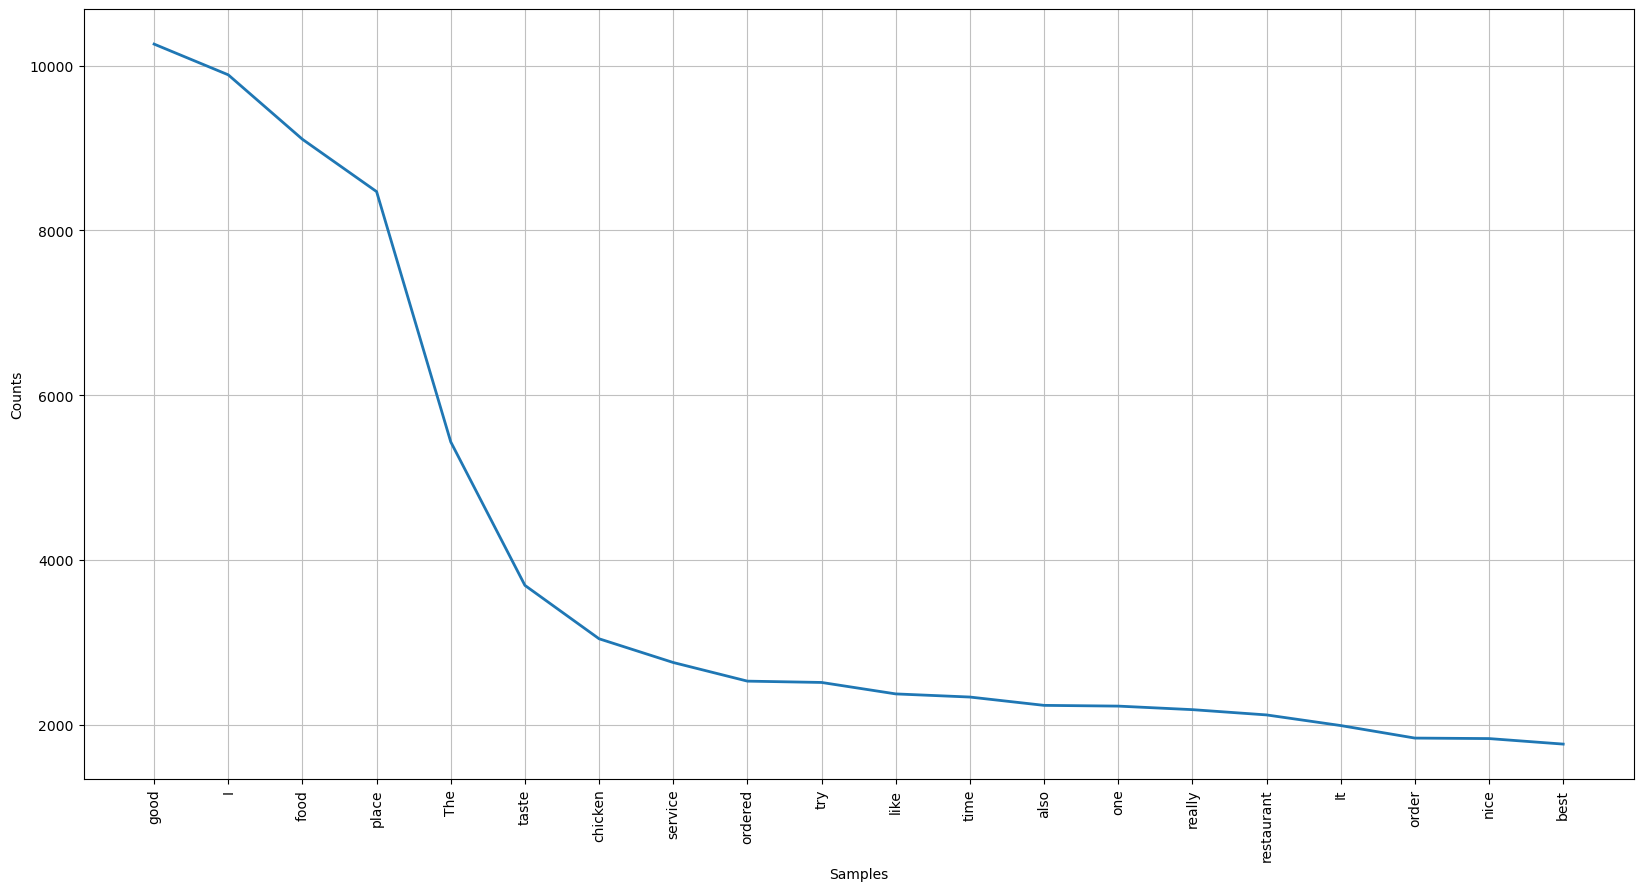

<Axes: xlabel='Samples', ylabel='Counts'>

In [57]:
# Unigram analysis - Analysing the frequency of all words used in this list (reviews) without picking certain words. Count on Y and Word on X.
# Here, we plot for the most common 20 keywords
plt.figure(figsize=(20,10))
fd.plot(20)

We want to see the keywords that are extremely used that impact the sales of the restaurants.

Not just the word 'food', is it good food, spicy food, expensive food, etc. We want to draw meaningful insights.

In [58]:
from nltk import FreqDist, bigrams, trigrams

In [59]:
bi_grams = bigrams(total_reviews_1D)

In [60]:
fd_bigrams = FreqDist()

In [61]:
for bigram in bi_grams:
    fd_bigrams[bigram] += 1

In [62]:
fd_bigrams.most_common(20)

[(('I', 'ordered'), 898),
 (('really', 'good'), 713),
 (('must', 'try'), 605),
 (('This', 'place'), 532),
 (('The', 'food'), 506),
 (('food', 'good'), 445),
 (('I', 'would'), 418),
 (('visit', 'place'), 408),
 (('fried', 'rice'), 403),
 (('good', 'food'), 403),
 (('ice', 'cream'), 395),
 (('good', 'place'), 390),
 (('taste', 'good'), 379),
 (('non', 'veg'), 374),
 (('also', 'good'), 366),
 (('I', 'tried'), 355),
 (('place', 'I'), 336),
 (('food', 'I'), 329),
 (('main', 'course'), 318),
 (('good', 'taste'), 306)]

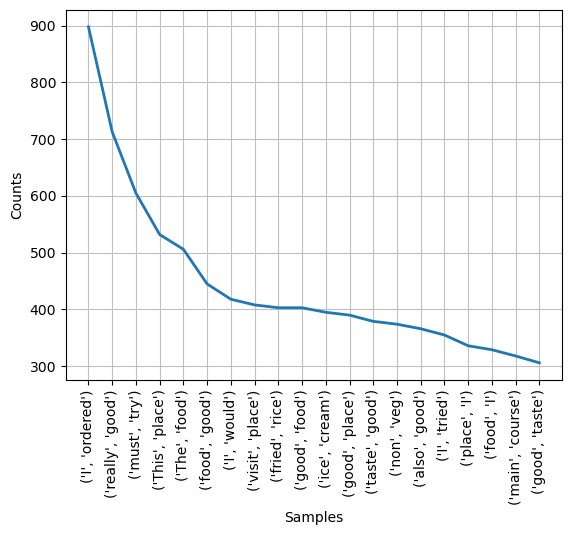

<Axes: xlabel='Samples', ylabel='Counts'>

In [63]:
fd_bigrams.plot(20)

In [64]:
fd_bigrams.most_common(100)

[(('I', 'ordered'), 898),
 (('really', 'good'), 713),
 (('must', 'try'), 605),
 (('This', 'place'), 532),
 (('The', 'food'), 506),
 (('food', 'good'), 445),
 (('I', 'would'), 418),
 (('visit', 'place'), 408),
 (('fried', 'rice'), 403),
 (('good', 'food'), 403),
 (('ice', 'cream'), 395),
 (('good', 'place'), 390),
 (('taste', 'good'), 379),
 (('non', 'veg'), 374),
 (('also', 'good'), 366),
 (('I', 'tried'), 355),
 (('place', 'I'), 336),
 (('food', 'I'), 329),
 (('main', 'course'), 318),
 (('good', 'taste'), 306),
 (('good', 'I'), 304),
 (('We', 'ordered'), 291),
 (('quality', 'food'), 283),
 (('The', 'place'), 277),
 (('I', 'love'), 275),
 (('good', 'The'), 262),
 (('I', 'got'), 254),
 (('pretty', 'good'), 250),
 (('good', 'service'), 249),
 (('time', 'I'), 243),
 (('one', 'best'), 233),
 (('The', 'ambience'), 230),
 (('pocket', 'friendly'), 230),
 (('value', 'money'), 230),
 (('nice', 'place'), 223),
 (('chicken', 'biryani'), 216),
 (('I', 'like'), 211),
 (('place', 'good'), 210),
 (('

In [65]:
tri_grams = trigrams(total_reviews_1D)

In [66]:
fd_trigrams = FreqDist()

In [67]:
for tri_gram in tri_grams:
    fd_trigrams[tri_gram] += 1

In [68]:
fd_trigrams.most_common(50)

[(('paneer', 'tikka', 'biriyani'), 88),
 (('veg', 'non', 'veg'), 80),
 (('I', 'ordered', 'food'), 75),
 (('south', 'Indian', 'food'), 74),
 (('must', 'visit', 'place'), 72),
 (('I', 'would', 'recommend'), 63),
 (('The', 'food', 'good'), 63),
 (('paneer', 'butter', 'masala'), 62),
 (('Good', 'food', 'Good'), 60),
 (('I', 'ordered', 'chicken'), 60),
 (('delious', 'good', 'need'), 58),
 (('good', 'need', 'sum'), 58),
 (('need', 'sum', 'spacy'), 58),
 (('sum', 'spacy', 'food'), 58),
 (('spacy', 'food', 'bangnda'), 58),
 (('food', 'bangnda', 'fry'), 58),
 (('bangnda', 'fry', 'received'), 58),
 (('fry', 'received', 'Nice'), 58),
 (('I', 'visited', 'place'), 57),
 (('The', 'ambience', 'good'), 56),
 (('A', 'good', 'place'), 56),
 (('Taiwanese', 'baby', 'corn'), 56),
 (('main', 'course', 'ordered'), 56),
 (('received', 'Nice', 'delious'), 55),
 (('Nice', 'delious', 'good'), 55),
 (('nService', 'nValue', 'money'), 54),
 (('The', 'staff', 'friendly'), 53),
 (('I', 'must', 'say'), 52),
 (('The', 

Extract Geographical coordinates from data

In [69]:
# %pip install geocoder
# %pip install geopy

Note: you may need to restart the kernel to use updated packages.



In [70]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [71]:
df['location'] = df['location'] + ', Bangalore, Karnataka, India'

In [72]:
df['location']

0                Banashankari, Bangalore, Karnataka, India
1                Banashankari, Bangalore, Karnataka, India
2                Banashankari, Bangalore, Karnataka, India
3                Banashankari, Bangalore, Karnataka, India
4                Basavanagudi, Bangalore, Karnataka, India
                               ...                        
51712              Whitefield, Bangalore, Karnataka, India
51713              Whitefield, Bangalore, Karnataka, India
51714              Whitefield, Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield, Bangalore, Karnata...
51716    ITPL Main Road, Whitefield, Bangalore, Karnata...
Name: location, Length: 51717, dtype: object

In [73]:
df_copy = df.copy()

In [74]:
df_copy['location'].isnull().sum()

21

In [75]:
df_copy = df_copy.dropna(subset=['location'])

In [76]:
df_copy['location'].unique()

array(['Banashankari, Bangalore, Karnataka, India',
       'Basavanagudi, Bangalore, Karnataka, India',
       'Mysore Road, Bangalore, Karnataka, India',
       'Jayanagar, Bangalore, Karnataka, India',
       'Kumaraswamy Layout, Bangalore, Karnataka, India',
       'Rajarajeshwari Nagar, Bangalore, Karnataka, India',
       'Vijay Nagar, Bangalore, Karnataka, India',
       'Uttarahalli, Bangalore, Karnataka, India',
       'JP Nagar, Bangalore, Karnataka, India',
       'South Bangalore, Bangalore, Karnataka, India',
       'City Market, Bangalore, Karnataka, India',
       'Nagarbhavi, Bangalore, Karnataka, India',
       'Bannerghatta Road, Bangalore, Karnataka, India',
       'BTM, Bangalore, Karnataka, India',
       'Kanakapura Road, Bangalore, Karnataka, India',
       'Bommanahalli, Bangalore, Karnataka, India',
       'CV Raman Nagar, Bangalore, Karnataka, India',
       'Electronic City, Bangalore, Karnataka, India',
       'HSR, Bangalore, Karnataka, India',
       'Marat

In [77]:
locations = pd.DataFrame(df_copy['location'].unique())

In [78]:
locations.columns = ['name']

In [79]:
locations

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [80]:
from geopy.geocoders import Nominatim

In [81]:
geolocator = Nominatim(user_agent="app", timeout=None)

In [82]:
lat = []
lon = []
for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [83]:
locations['latitude'] = lat
locations['longitude'] = lon

In [84]:
locations

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka, India",12.915219,77.573621
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946703,77.530070
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.009476,77.553089
89,"Magadi Road, Bangalore, Karnataka, India",12.975653,77.555355
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


Performing Spatial Analysis

In [86]:
# Checking missing values first
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [88]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [95]:
locations.iloc[45]

name         St. Marks Road, Bangalore, Karnataka, India
latitude                                       12.974426
longitude                                       77.60153
Name: 45, dtype: object

In [96]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [97]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [98]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [99]:
df['cuisines'].isnull().sum()

45

In [101]:
df = df.dropna(subset=['cuisines'])

In [106]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [107]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [108]:
north_india['location'].value_counts()

BTM, Bangalore, Karnataka, India                  2469
HSR, Bangalore, Karnataka, India                  1123
Whitefield, Bangalore, Karnataka, India           1059
Marathahalli, Bangalore, Karnataka, India         1038
JP Nagar, Bangalore, Karnataka, India              958
                                                  ... 
Hebbal, Bangalore, Karnataka, India                  4
Jakkur, Bangalore, Karnataka, India                  3
Central Bangalore, Bangalore, Karnataka, India       2
West Bangalore, Bangalore, Karnataka, India          1
Peenya, Bangalore, Karnataka, India                  1
Name: location, Length: 90, dtype: int64

Since we want it as a dataframe we're going to reset the index of the value count and rename the columns respectively.

In [112]:
north_india_reset = north_india['location'].value_counts().reset_index().rename(columns={'index': 'name', 'location' : 'count'})

In [113]:
north_india_reset

,name,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


Now we will update this dataframe by appending the lat and long values.

We will merge the two dataframes north_inda_reset and location to get all the data we need to visualise a heatmap. We perform a left join on the merge since we want to join the locations data based on the names of the north_india_reset dataframe, and we do not want other rows.

In [114]:
## # # # #                     left_df.merge(right_df, on='column_name', how='left/right')
heatmap_df = north_india_reset.merge(locations, on='name', how='left')

In [115]:
heatmap_df

,name,count,latitude,longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangalore, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore, Karnataka, India",958,12.912076,77.579393
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore, Karnataka, India",2,12.973393,77.611234
88,"West Bangalore, Bangalore, Karnataka, India",1,13.009476,77.553089


We will visualise this heatmap on top of a base map visualisation. We get the base map first.

We will use the folium package which we can use the heatmap from on a base map.

In [116]:
%pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/97.0 kB ? eta -:--:--
   ----------------------------- ---------- 71.7/97.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 97.0/97.0 kB 1.1 MB/s eta 0:00:00


In [120]:
import folium

In [121]:
basemap = folium.Map()

In [122]:
basemap

In [119]:
from folium.plugins import HeatMap 

In [118]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [124]:
HeatMap(heatmap_df[['latitude','longitude','count']]).add_to(basemap)

In [125]:
basemap

Automating data analysis

We might want to create geodata analysis for restaurants serving Chinese cuisines, or Mexican or Thai, etc.

We create a user-defined function for that.

In [126]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index': 'name', 'location' : 'count'})

    heatmap_df = cuisine_rest_count.merge(locations, on='name', how='left')
    print(heatmap_df.head(4))

    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude','longitude','count']]).add_to(basemap)
    return basemap

In [131]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [129]:
get_heatmap('Chinese')

                                                name  count   latitude  \
0                   BTM, Bangalore, Karnataka, India   1824  12.911276   
1                   HSR, Bangalore, Karnataka, India    760  12.911623   
2  Koramangala 5th Block, Bangalore, Karnataka, I...    730  12.934843   
3          Marathahalli, Bangalore, Karnataka, India    668  12.955257   

   longitude  
0  77.604565  
1  77.638862  
2  77.618977  
3  77.698416  
